## Download data, clean dataframes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# download file
file_id1 = "1S2teXJx6U18Q0mUEDIhFVRy_eBFan5Y8" 
!gdown https://drive.google.com/uc?id={file_id1}

In [ ]:
# import packages 
import pandas as pd 
import numpy as np

In [ ]:
expression_all = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/final_expressionProfile.csv", index_col=0)
expression_all = expression_all.iloc[:-1]

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
expression_all = expression_all.set_index('ID_REF')
expression_all.index.names = [None]

In [ ]:
expression_all 

,1_CR,2_CR,3_CR,4_CR,5_CR,6_CR,7_CR,8_CR,9_CR,10_CR,...,221_VC,222_VC,223_VC,224_VC,225_VC,226_VC,227_VC,228_VC,229_VC,230_VC
10019475365,0.161000,0.0253,0.12900,-0.05630,-0.000917,0.03530,0.20000,-0.0667,-0.02650,0.08040,...,0.0393,0.040000,0.1100,0.000309,0.12500,0.01340,0.00815,0.02370,0.21400,0.1240
10019481149,-0.000963,0.0389,0.04060,0.03760,-0.008600,-0.00323,0.00883,0.0516,-0.00482,0.06400,...,0.0909,0.000581,0.0607,0.077700,0.12000,0.07500,0.01220,0.15500,0.09010,0.0798
10019495284,-0.030400,0.1190,-0.09080,0.05950,0.066300,-0.04970,-0.14200,-0.0654,-0.07320,-0.07220,...,-0.0718,0.031300,-0.2170,-0.136000,-0.02170,-0.00307,-0.05450,0.15500,-0.05760,0.0770
10019687586,0.041200,-0.0109,-0.00965,0.07500,-0.039600,0.01140,-0.09160,0.0044,0.06530,-0.10200,...,-0.0126,-0.067800,-0.0617,-0.066800,0.06520,0.07510,-0.07830,0.13500,-0.01770,-0.0122
10019713746,0.026900,0.1100,0.07180,-0.04450,0.024600,0.01640,0.08630,0.0547,0.03220,0.10400,...,0.0382,0.064200,0.0650,-0.014000,0.06130,-0.02910,-0.01330,-0.00527,0.11500,0.1680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10033669045,-0.121000,0.1810,-0.14700,-0.13500,0.026200,-0.04640,-0.05910,0.2370,-0.06750,-0.00892,...,-0.2900,-0.073000,-0.3040,-0.254000,-0.27400,-0.26400,-0.04240,-0.12200,-0.38800,-0.1460
10033669046,0.140000,-0.2770,0.10100,0.00437,-0.103000,0.11500,0.01880,-0.0676,0.13500,0.05160,...,0.1710,0.228000,0.2310,0.119000,0.24900,0.15100,0.11000,0.19700,0.17600,-0.0638
10033669047,-0.023000,-0.2020,0.08910,-0.24600,-0.229000,0.19200,-0.05500,0.1280,0.02870,0.06600,...,0.0103,-0.011400,0.1020,-0.045400,0.00884,-0.06960,-0.06400,-0.15900,0.04020,-0.0890
10033669048,-0.102000,0.0488,-0.00426,0.00476,0.035900,-0.00359,0.07100,0.0441,0.00947,0.02590,...,0.0446,-0.035600,0.0405,0.046300,-0.03570,0.02070,-0.05430,-0.17100,0.00788,-0.0447


In [ ]:
# split df to each brain region
cr = expression_all.iloc[:, 0:230]
pfc = expression_all.iloc[:, 230:460]
vc = expression_all.iloc[:, 460:690]

# replace brain region and just make individual names for columns 
cols = list(range(1,231))

cr.columns = cols 
pfc.columns = cols 
vc.columns = cols 

In [ ]:
cr = cr.dropna().T
pfc = pfc.dropna().T
vc = vc.dropna().T

In [ ]:
## scale data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cr_scaled = scaler.fit_transform(cr)
pfc_scaled = scaler.fit_transform(pfc)
vc_scaled = scaler.fit_transform(vc)

# return scaled data as pd dataframe
cr = pd.DataFrame(cr_scaled, index = cr.index, columns = cr.columns)
pfc = pd.DataFrame(pfc_scaled, index = pfc.index, columns = pfc.columns)
vc = pd.DataFrame(vc_scaled, index = vc.index, columns = vc.columns)

In [ ]:
cr

,10019475365,10019481149,10019495284,10019687586,10019713746,10019799479,10019809115,10019874890,10019903058,10019909307,...,10033669039,10033669040,10033669041,10033669042,10033669043,10033669045,10033669046,10033669047,10033669048,10033669049
1,1.902154,-0.560533,0.362693,0.207016,-0.082776,1.333893,0.331936,1.048883,-0.040999,-0.614909,...,-0.881179,0.048624,-1.094967,0.175522,0.136887,-0.516183,0.927800,-0.105289,-1.410003,-0.079810
2,-0.097821,0.791798,1.467917,-0.147097,1.738572,-0.137733,-0.585888,-0.159384,-1.092410,-0.954249,...,-0.411626,-0.457115,0.928562,-0.947983,0.012561,1.489539,-2.810673,-1.540408,1.111360,0.489769
3,1.430531,0.849470,-0.084131,-0.138601,0.901322,0.866052,0.703465,1.186134,0.002041,0.402773,...,0.495427,-0.019187,0.005792,-0.228783,-0.492348,-0.688861,0.578158,0.793465,0.224201,0.468029
4,-1.300459,0.747696,1.027751,0.436747,-1.647689,-1.556061,-1.106622,0.025119,-0.647251,-0.419460,...,0.908890,-0.323243,-0.033340,0.086376,-1.239983,-0.609163,-0.288145,-1.893175,0.375015,0.127441
5,-0.484213,-0.819615,1.078055,-0.342164,-0.133186,-0.149578,-0.745497,-1.306899,-0.728105,-0.033617,...,-0.456498,-0.167496,-0.088883,-0.190240,-1.102966,0.461441,-1.250735,-1.756879,0.895673,-0.181987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,-0.258468,-0.527867,-1.387614,-0.452272,0.267905,-0.045942,0.416645,0.169121,-0.535500,-1.090052,...,0.447991,-0.293056,-0.343118,0.414120,-0.295759,-1.206895,0.676775,0.627504,-0.612464,0.141934
227,-1.039593,0.398274,-1.128693,-0.702393,-1.202763,-0.443311,-0.650683,-1.144897,-0.007182,-0.948351,...,1.077160,-0.210370,1.030812,0.330217,-0.735106,-0.715426,1.223650,-1.893175,-0.525520,-1.286361
228,-1.293090,3.339527,1.215654,1.109628,1.028444,1.813578,-0.333843,1.339136,-0.077891,1.742272,...,-2.967723,0.280493,-0.076260,1.198082,0.319327,-0.073197,1.869142,-0.674526,-2.714157,-0.017490
229,1.297887,1.677227,0.003902,0.033698,-0.122228,1.994200,-0.971386,-1.500401,-0.316764,-1.177667,...,0.340459,0.092373,0.826313,0.339394,-0.053447,-1.545609,0.909869,1.249657,-0.709439,0.410057


In [ ]:
vc

,10019475365,10019481149,10019495284,10019687586,10019713746,10019799479,10019809115,10019874890,10019903058,10019909307,...,10033669039,10033669040,10033669041,10033669042,10033669043,10033669045,10033669046,10033669047,10033669048,10033669049
1,0.684933,0.848880,0.543755,-1.313268,-0.185270,0.640372,-0.501237,0.049271,-0.314959,0.130611,...,0.148953,-0.316344,-0.076073,0.951443,-1.234890,-0.498661,0.321288,0.412022,-0.445942,-0.579920
2,1.510131,0.133188,1.808286,-0.770056,0.946574,0.933358,1.472579,1.126277,-1.577607,-0.567059,...,-0.985163,1.005306,1.020353,1.459748,-0.654847,1.327271,-0.403254,0.166941,-1.993128,-1.019054
3,-0.416818,0.312743,-0.128003,0.427080,-0.153735,-0.572453,-0.961405,-0.299929,1.111968,-0.484980,...,0.325695,-0.144390,-0.805989,-0.289706,-1.919850,-0.633085,-0.144913,-1.317243,0.487351,0.096629
4,0.539966,-0.559237,0.591215,-1.829911,-0.116234,-0.447864,-0.160902,0.328631,-1.306357,-0.440210,...,-0.614611,-0.070409,1.113534,-0.140308,1.238161,0.021114,0.036947,-0.320176,0.026516,-0.613955
5,0.774144,-0.377861,0.883209,-1.652777,0.886914,0.891503,1.000071,0.758698,-1.680758,0.158592,...,-1.339995,0.077552,1.351662,1.934903,-1.275358,1.237654,-1.168181,-0.600268,-1.525199,-0.776659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,-0.425739,1.521580,0.455382,1.345227,-0.827046,-0.489719,-0.773051,-0.768592,-0.003595,0.281710,...,0.581713,0.479445,-0.148547,-0.204399,-0.163234,-1.120374,0.928241,-0.476967,0.855204,0.486785
227,-0.484283,-0.066598,0.012395,-0.919144,-0.692384,-0.627018,-0.612464,-0.945214,-0.148770,-0.537212,...,0.485953,0.341482,0.357735,0.796742,0.493248,0.120812,0.684748,-0.434344,-0.276884,-1.197530
228,-0.310880,3.544737,1.816900,2.229425,-0.623945,0.036262,-0.518611,-0.318308,0.745208,1.630414,...,-1.465759,0.457451,-0.460599,-0.321000,-0.379064,-0.325029,1.201430,-1.157408,-2.038412,2.462473
229,1.811217,1.903451,-0.014306,-0.024614,0.401107,1.589090,0.871796,0.258791,-0.361950,0.615622,...,0.220817,-0.180380,0.501647,0.560269,0.617650,-1.814900,1.076713,0.358743,0.661692,-0.359938


In [ ]:
pfc

,10019475365,10019481149,10019495284,10019687586,10019713746,10019799479,10019809115,10019874890,10019903058,10019909307,...,10033669039,10033669040,10033669041,10033669042,10033669043,10033669045,10033669046,10033669047,10033669048,10033669049
1,-0.057101,-0.698313,0.196835,0.610401,-0.176611,-0.074515,-0.844486,-0.286703,0.593689,0.459390,...,-0.050187,0.025933,-0.011341,-0.020068,-0.353899,-0.793605,-0.158645,-0.238623,-0.806136,-0.077449
2,-0.770660,-0.032965,1.106835,-0.227760,-0.632774,-0.886008,-1.318603,-0.380585,-0.529662,1.175275,...,-0.354998,0.551265,-0.444483,-0.203636,-0.589903,0.077334,0.135774,-0.194401,-0.366788,0.346099
3,1.194964,0.957676,-0.373128,2.211796,1.224918,1.206790,1.019839,1.160053,1.802986,-0.348638,...,1.118255,0.819107,-0.087096,0.799105,0.005934,-0.737233,0.439912,-0.947060,1.274551,0.346099
4,-1.677072,-0.197087,0.872756,0.546904,-1.465165,-1.311330,-0.209651,-1.018506,-0.392536,0.260927,...,-0.038091,-0.296253,-0.270246,-0.911520,1.021333,-0.810516,-0.224691,-1.230080,0.823598,1.072182
5,-1.233509,-1.694860,0.250160,-0.432220,0.149524,0.000228,-1.696290,-0.082087,-1.086371,1.312309,...,-1.199276,0.067339,-1.445345,0.140554,-0.731214,-0.033718,0.106980,-0.646350,0.571594,-0.094737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,0.631238,0.305615,-0.657070,-0.758595,0.094103,-0.095870,-0.062996,0.442693,-0.709761,-0.499375,...,-0.449344,-0.082756,-0.342080,0.991851,-1.229445,-1.103648,0.948306,-0.509262,0.062613,-0.722280
227,0.669809,0.285930,-0.878684,-2.512382,-0.800105,0.002008,2.773671,0.303073,-1.548495,-0.616799,...,1.171476,0.948499,-0.256967,1.037743,0.633821,0.157381,-1.715142,-1.937632,-0.482842,-1.723237
228,0.017073,0.610730,0.046553,-1.090049,1.374130,1.592962,-0.211660,1.227456,-0.566805,-1.248810,...,-1.315394,1.556642,0.657979,1.347514,-1.223618,0.312967,1.686153,0.791749,-0.690082,-0.310833
229,2.915813,1.715543,-0.712474,-1.011313,1.949663,3.497123,0.614027,3.733400,-1.077733,0.395598,...,-0.863016,0.767350,0.657979,1.565502,-0.949736,-1.813928,1.722146,0.447702,-0.728214,0.242373


In [ ]:
print(cr.shape)
print(pfc.shape)
print(vc.shape)

(230, 39081)
(230, 39005)
(230, 37185)


## Feature selection (PCA)


In [ ]:
! pip install pca

In [ ]:
from pca import pca 

In [ ]:
def PCA(df):
  model = pca()
  out = model.fit_transform(df)
  topFeatures = out['topfeat']
  return model, topFeatures

In [ ]:
model_cr, topFeats_cr = PCA(cr)
model_pfc, topFeats_pfc = PCA(pfc)
model_vc, topFeats_vc = PCA(vc)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [152] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [91] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [152] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[91]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [153] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [89] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [153] columns of the input dataf

PCA explained variance plot 
1. CR 2. PFC 3.VC 

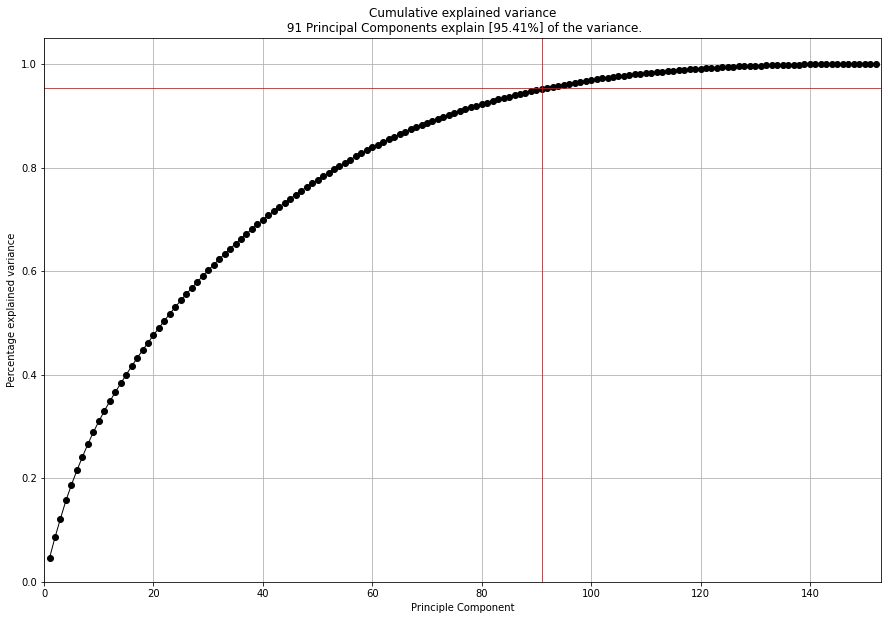

<Figure size 432x288 with 0 Axes>

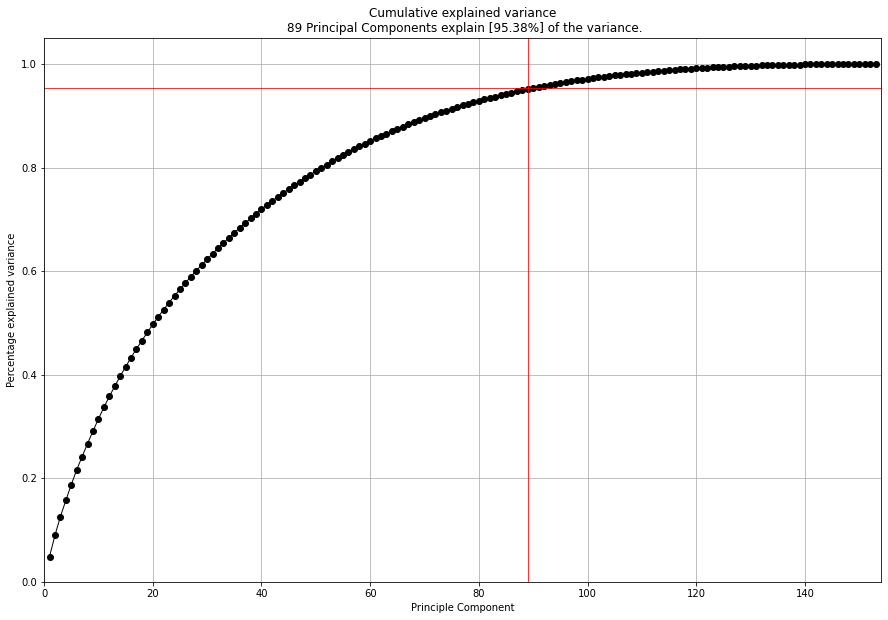

<Figure size 432x288 with 0 Axes>

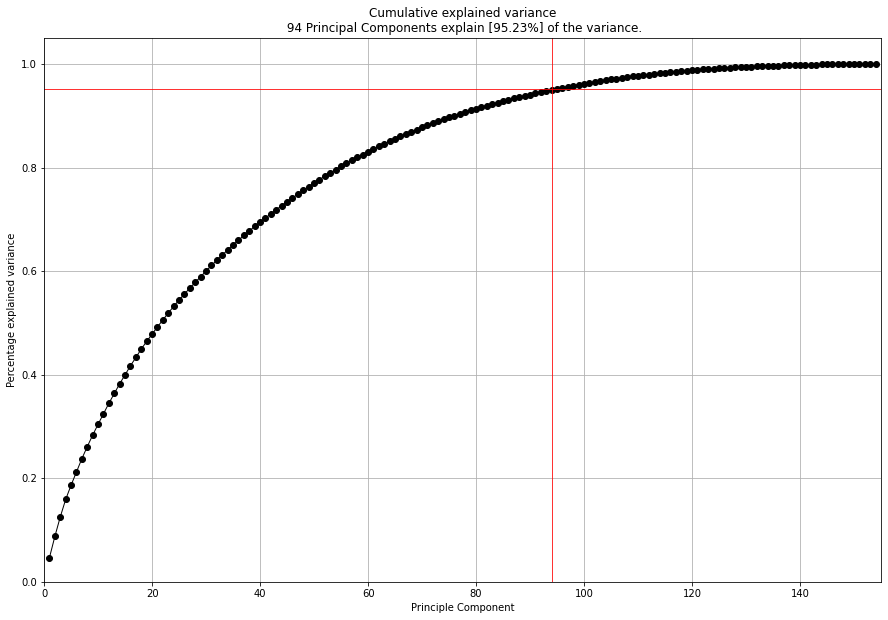

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe1adc224c0>)

<Figure size 432x288 with 0 Axes>

In [ ]:
model_cr.plot()
model_pfc.plot()
model_vc.plot()

In [ ]:
import itertools

In [ ]:
# Use topFeatures that expain 95% of the variance 
def Compact(data, topFeats, numFeats):
  selectedFeats = topFeats[['feature']].iloc[:numFeats].values.tolist()
  selectedFeats = list(itertools.chain.from_iterable(selectedFeats))
  eliminated = data[selectedFeats]
  return eliminated 

In [ ]:
Compact(vc, topFeats_vc, 154).to_csv("/content/drive/MyDrive/Computational Medicine Group/vc_featureSelected.csv")
Compact(pfc, topFeats_pfc, 153).to_csv("/content/drive/MyDrive/Computational Medicine Group/pfc_featureSelected.csv")
Compact(cr, topFeats_cr, 152).to_csv("/content/drive/MyDrive/Computational Medicine Group/cr_featureSelected.csv")

In [ ]:
print(Compact(vc, topFeats_vc, 154).shape)
print(Compact(pfc, topFeats_pfc, 153).shape)
print(Compact(cr, topFeats_cr, 152).shape)


(230, 154)
(230, 153)
(230, 152)


In [ ]:
vc = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/vc_featureSelected.csv",index_col=0)
pfc = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/pfc_featureSelected.csv",index_col=0)
cr = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/cr_featureSelected.csv",index_col=0)

In [ ]:
cr

,10025902323,10025908300,10023818388,10023838527,10025928718,10025931684,10023824639,10025932305,10025918004,10025907010,...,10025919122,10025906202,10025925784.1,10025904214,10025903041.1.1,10025927646,10023849516,10023849014,10023818631,10025929714
1,-0.105633,1.071403,0.197403,-0.530136,-0.351188,0.773174,0.034669,0.084475,-0.038388,0.269045,...,-0.113720,0.402273,0.021738,-0.040028,0.244994,-0.348010,0.788506,-0.327747,-2.223564,0.004429
2,-1.828617,0.474423,1.512807,-0.354834,-0.060880,-0.667210,-0.945949,0.256733,0.117964,-0.457202,...,-0.860159,1.205511,0.529705,0.248584,-0.109641,-0.779396,-1.747982,0.370586,0.922913,-0.284121
3,0.254515,-0.766120,-0.177163,-0.664723,-0.282340,-0.361973,0.318966,-0.267992,-0.474133,0.666680,...,-0.237953,0.155735,0.208474,-0.415916,0.105079,-0.311943,-0.029701,-0.111649,-0.568477,0.110231
4,-0.709171,0.024101,-0.913022,0.029133,0.941620,-0.547647,1.956764,-0.029481,0.912639,0.257041,...,-0.088665,1.531578,0.212920,0.040279,0.139019,-0.173334,1.050902,0.209011,-0.034500,-1.110096
5,-0.692708,-1.723702,0.100075,0.288693,-1.621047,-0.691123,0.289095,0.008504,-0.960183,-2.952550,...,3.667543,-0.265170,0.538597,0.291186,-0.009207,-0.361447,-1.114734,1.296469,-0.508072,-1.326509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,0.440667,-0.298951,-0.245735,0.077766,-0.400911,0.299141,-0.061126,-0.513570,-0.192700,-0.040360,...,0.441673,0.366485,0.907623,-0.943645,0.244994,0.209256,2.007187,0.619596,-0.058662,0.421264
227,0.244384,-0.335812,0.282934,0.822516,0.309878,0.031882,1.101813,-0.334687,-0.357005,-0.254633,...,0.159800,-1.162450,0.137337,0.020709,0.129322,-0.087764,-0.271571,-0.662349,0.537531,0.129468
228,0.344425,1.152495,1.085153,0.252502,-0.300190,-0.147884,-0.818221,0.105234,0.153313,-0.658270,...,-0.578287,1.056395,-0.416202,-0.142604,0.005338,-0.785054,-0.320551,-1.195622,0.264503,-0.110991
229,-0.468566,0.502029,-0.367837,-0.236647,0.100785,-0.706596,0.542490,0.116276,-0.583579,-1.204456,...,-0.829884,2.475979,-0.014942,-0.639965,-0.775274,-0.787883,-0.470991,0.271749,-1.764489,-0.417576


## k-means clustering


In [ ]:
vc = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/vc_featureSelected.csv",index_col=0)
pfc = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/pfc_featureSelected.csv",index_col=0)
cr = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/cr_featureSelected.csv",index_col=0)

In [ ]:
## scale data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cr_scaled = scaler.fit_transform(cr)
pfc_scaled = scaler.fit_transform(pfc)
vc_scaled = scaler.fit_transform(vc)

# return scaled data as pd dataframe
cr = pd.DataFrame(cr_scaled, index = cr.index, columns = cr.columns)
pfc = pd.DataFrame(pfc_scaled, index = pfc.index, columns = pfc.columns)
vc = pd.DataFrame(vc_scaled, index = vc.index, columns = vc.columns)

In [ ]:
k = 6
lsq_cr = np.zeros((k))
lsq_pfc = np.zeros((k))
lsq_vc = np.zeros((k))
cr_sil = []
pfc_sil = []
vc_sil = []

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for i in range(1, 1+k):
  kmeans_cr = KMeans(n_clusters=i, random_state=30)
  kmeans_cr.fit(cr)
  labels_cr = kmeans_cr.predict(cr)
  centroids_cr  = kmeans_cr.cluster_centers_
  lsq_cr[i-1] = kmeans_cr.inertia_
  if i != 1:
    cr_sil.append(silhouette_score(cr, labels_cr))

  kmeans_pfc = KMeans(n_clusters=i, random_state=30)
  kmeans_pfc.fit(pfc)
  labels_pfc = kmeans_pfc.predict(pfc)
  centroids_pfc  = kmeans_pfc.cluster_centers_
  lsq_pfc[i-1] = kmeans_pfc.inertia_
  if i != 1:
    pfc_sil.append(silhouette_score(pfc, labels_pfc))

  kmeans_vc = KMeans(n_clusters=i, random_state=30)
  kmeans_vc.fit(vc)
  labels_vc = kmeans_vc.predict(vc)
  centroids_vc  = kmeans_vc.cluster_centers_
  lsq_vc[i-1] = kmeans_vc.inertia_
  if i != 1:
    vc_sil.append(silhouette_score(vc, labels_vc))


least sqaure distance for kmeans

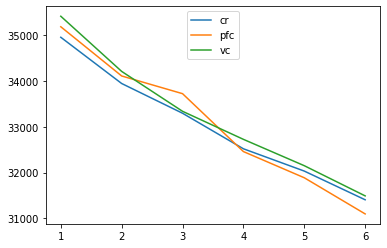

In [ ]:
import matplotlib.pyplot as plt
line1, = plt.plot(list(range(1,1+k)), lsq_cr, label="cr")
line2, = plt.plot(list(range(1,1+k)), lsq_pfc, label="pfc")
line3, = plt.plot(list(range(1,1+k)), lsq_vc, label="vc")
leg = plt.legend(loc='upper center')
plt.show()

silhouette for kmeans

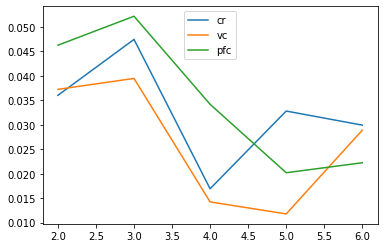

In [ ]:
#plot silhouette score
line1, = plt.plot(list(range(2,1+k)), cr_sil, label="cr")
line2, = plt.plot(list(range(2,1+k)), vc_sil, label="vc")
line3, = plt.plot(list(range(2,1+k)), pfc_sil, label="pfc")
leg = plt.legend(loc='upper center')
plt.show()

### Sankey Plots (R) k-means

#### sankey plot packages and data transfer


In [ ]:
# CR - 3 clusters
kmeans_cr = KMeans(n_clusters=3)
kmeans_cr.fit(cr)
labels_cr = kmeans_cr.predict(cr)
centroids_cr  = kmeans_cr.cluster_centers_

# PFC - 2 clusters
kmeans_pfc = KMeans(n_clusters=2)
kmeans_pfc.fit(pfc)
labels_pfc = kmeans_pfc.predict(pfc)
centroids_pfc  = kmeans_pfc.cluster_centers_

# VC - 2 clusters
kmeans_vc = KMeans(n_clusters=2)
kmeans_vc.fit(vc)
labels_vc = kmeans_vc.predict(vc)
centroids_vc  = kmeans_vc.cluster_centers_

In [ ]:
# import R magic and packages

# resolve version conflict for R magic 
!pip install rpy2==3.5.1

%load_ext rpy2.ipython
#%reload_ext rpy2.ipython

In [ ]:
%%R
install.packages("remotes")
remotes::install_github("davidsjoberg/ggsankey")

library(ggsankey)

library(ggplot2)
library(dplyr)

In [ ]:
cr_r = np.reshape(labels_cr, (1, 230))
pfc_r = np.reshape(labels_pfc,(1,230))
vc_r = np.reshape(labels_vc, (1,230))
#cr, pfc, vc
labels_all = np.concatenate((cr_r, pfc_r, vc_r), axis =0)
labels_all = labels_all.T
print(labels_all.shape)

(230, 3)


In [ ]:
labels_pd = pd.DataFrame(labels_all, columns = ['CR','PFC','VC'])
labels_pd

,CR,PFC,VC
0,1,0,0
1,2,1,0
2,1,0,1
3,2,0,0
4,2,1,0
...,...,...,...
225,0,0,1
226,0,1,0
227,0,1,1
228,0,1,0


In [ ]:
labels_kmeans = labels_pd

#### plot

In [ ]:
#transfer python variable --> R variable
%R -i labels_pd

In [ ]:
%%R 
df <- labels_pd %>%
  make_long(CR, PFC, VC)
df

# A tibble: 690 × 4
   x      node next_x next_node
   <fct> <int> <fct>      <int>
 1 CR        1 PFC            0
 2 PFC       0 VC             0
 3 VC        0 <NA>          NA
 4 CR        2 PFC            1
 5 PFC       1 VC             0
 6 VC        0 <NA>          NA
 7 CR        1 PFC            0
 8 PFC       0 VC             1
 9 VC        1 <NA>          NA
10 CR        2 PFC            0
# … with 680 more rows
# ℹ Use `print(n = ...)` to see more rows


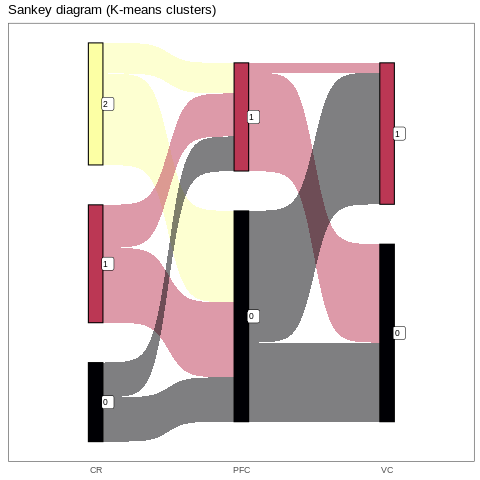

In [ ]:
%%R
# Chart 1
pl <- ggplot(df, aes(x = x
                     , next_x = next_x
                     , node = node
                     , next_node = next_node
                     , fill = factor(node)
                     , label = node)
             )
pl <- pl +geom_sankey(flow.alpha = 0.5
                      , node.color = "black"
                      ,show.legend = FALSE)
pl <- pl +geom_sankey_label(size = 3, color = "black", fill= "white", hjust = -0.5)
pl <- pl +  theme_bw()
pl <- pl + theme(legend.position = "none")
pl <- pl +  theme(axis.title = element_blank()
                  , axis.text.y = element_blank()
                  , axis.ticks = element_blank()  
                  , panel.grid = element_blank())
pl <- pl + scale_fill_viridis_d(option = "inferno")
pl <- pl + labs(title = "Sankey diagram (K-means clustering)")
# pl <- pl + labs(subtitle = "using  David Sjoberg's ggsankey package")
# pl <- pl + labs(caption = "@techanswers88")
pl <- pl + labs(fill = 'Nodes')
pl

## Agglomerative hierarchical clustering (sklearn)
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [ ]:
vc_norm = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/vc_featureSelected.csv",index_col=0)
pfc_norm = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/pfc_featureSelected.csv",index_col=0)
cr_norm = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/cr_featureSelected.csv",index_col=0)

In [ ]:
# import packages 
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [ ]:
# find best cluster score
k = 10
cr_sil = []
vc_sil = []
pfc_sil = []

#CR
for i in range(2, 2+k):
  ac = AgglomerativeClustering(n_clusters=i).fit(cr_norm)
  labels_1 = ac.labels_
  print(labels_1)
  cr_sil.append(silhouette_score(cr_norm, labels_1))

#VC
for i in range(2, 2+k):
  ac = AgglomerativeClustering(n_clusters=i).fit(vc_norm)
  labels_2 = ac.labels_
  print(labels_2)
  vc_sil.append(silhouette_score(vc_norm, labels_2))

#PFC 
for i in range(2, 2+k):
  ac = AgglomerativeClustering(n_clusters=i).fit(pfc_norm)
  labels_3 = ac.labels_
  print(labels_3)
  pfc_sil.append(silhouette_score(pfc_norm, labels_3))


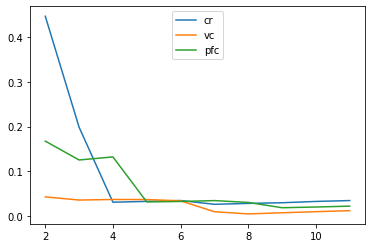

In [ ]:
line1, = plt.plot(list(range(2,2+k)), cr_sil, label="cr")
line2, = plt.plot(list(range(2,2+k)), vc_sil, label="vc")
line3, = plt.plot(list(range(2,2+k)), pfc_sil, label="pfc")
leg = plt.legend(loc='upper center')
plt.show()

#### Sankey plot (AC)

In [ ]:
#CR
ac = AgglomerativeClustering(n_clusters=2).fit(cr_norm)
labels_cr_ac = ac.labels_

#VC
ac = AgglomerativeClustering(n_clusters=2).fit(vc_norm)
labels_vc_ac = ac.labels_

#PFC 
ac = AgglomerativeClustering(n_clusters=2).fit(pfc_norm)
labels_pfc_ac = ac.labels_

In [ ]:
cr_ac_r = np.reshape(labels_cr_ac, (1, 230))
pfc_ac_r = np.reshape(labels_pfc_ac,(1,230))
vc_ac_r = np.reshape(labels_vc_ac, (1,230))
#cr, pfc, vc
labels_all_ac = np.concatenate((cr_ac_r, pfc_ac_r, vc_ac_r), axis =0)
labels_all_ac = labels_all_ac.T
print(labels_all_ac.shape)

(230, 3)


In [ ]:
labels_pd = pd.DataFrame(labels_all_ac, columns = ['CR','PFC','VC'])
labels_pd

,CR,PFC,VC
0,0,1,1
1,0,1,1
2,0,1,0
3,0,1,1
4,0,1,0
...,...,...,...
225,0,1,0
226,0,1,0
227,0,1,0
228,0,1,1


In [ ]:
labels_ac = labels_pd

#### plot

In [ ]:
#transfer python --> R variables
%R -i labels_pd

In [ ]:
%%R 
df <- labels_pd %>%
  make_long(CR, PFC, VC)
df

# A tibble: 690 × 4
   x      node next_x next_node
   <fct> <int> <fct>      <int>
 1 CR        0 PFC            1
 2 PFC       1 VC             1
 3 VC        1 <NA>          NA
 4 CR        0 PFC            1
 5 PFC       1 VC             1
 6 VC        1 <NA>          NA
 7 CR        0 PFC            1
 8 PFC       1 VC             0
 9 VC        0 <NA>          NA
10 CR        0 PFC            1
# … with 680 more rows
# ℹ Use `print(n = ...)` to see more rows


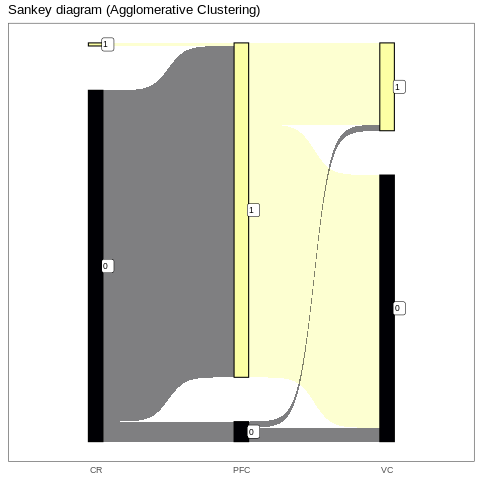

In [ ]:
%%R
# Chart 1
pl <- ggplot(df, aes(x = x
                     , next_x = next_x
                     , node = node
                     , next_node = next_node
                     , fill = factor(node)
                     , label = node)
             )
pl <- pl +geom_sankey(flow.alpha = 0.5
                      , node.color = "black"
                      ,show.legend = FALSE)
pl <- pl +geom_sankey_label(size = 3, color = "black", fill= "white", hjust = -0.5)
pl <- pl +  theme_bw()
pl <- pl + theme(legend.position = "none")
pl <- pl +  theme(axis.title = element_blank()
                  , axis.text.y = element_blank()
                  , axis.ticks = element_blank()  
                  , panel.grid = element_blank())
pl <- pl + scale_fill_viridis_d(option = "inferno")
pl <- pl + labs(title = "Sankey diagram (Agglomerative Clustering)")
# pl <- pl + labs(subtitle = "using  David Sjoberg's ggsankey package")
# pl <- pl + labs(caption = "@techanswers88")
pl <- pl + labs(fill = 'Nodes')
pl

# ANOVA 

In [ ]:
from scipy.stats import f_oneway

## K-means

### kmeans ANOVA data labeling

In [ ]:
labels_kmeans

,CR,PFC,VC
0,1,0,0
1,2,1,0
2,1,0,1
3,2,0,0
4,2,1,0
...,...,...,...
225,0,0,1
226,0,1,0
227,0,1,1
228,0,1,0


In [ ]:
labels_cr_k = labels_kmeans["CR"]
labels_pfc_k = labels_kmeans["PFC"]
labels_vc_k = labels_kmeans["VC"]

In [ ]:
vc = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/vc_featureSelected.csv",index_col=0)
pfc = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/pfc_featureSelected.csv",index_col=0)
cr = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/cr_featureSelected.csv",index_col=0)

In [ ]:
# add cluster labels to expression dataframe 
cr.insert(0, "label", labels_cr_k.tolist(), False)
vc.insert(0, "label", labels_vc_k.tolist(), False)
pfc.insert(0, "label", labels_pfc_k.tolist(), False )

In [ ]:
print(np.unique(labels_pfc_k))

[0 1 2]


In [ ]:
# split into multiple dataframe according to cluster label
#CR
grouped = cr.groupby(["label"])
cr0 = grouped.get_group(0)
cr1 = grouped.get_group(1)
cr2 = grouped.get_group(2)

cr0 = cr0.drop(columns= ["label"], axis = 1)
cr1 = cr1.drop(columns= ["label"], axis = 1)
cr2 = cr2.drop(columns= ["label"], axis = 1)

#VC 
grouped = vc.groupby(["label"])
vc0 = grouped.get_group(0)
vc1 = grouped.get_group(1)

vc0 = vc0.drop(columns= ["label"], axis = 1)
vc1 = vc1.drop(columns= ["label"], axis = 1)

#PFC
grouped = pfc.groupby(["label"])
pfc0 = grouped.get_group(0)
pfc1 = grouped.get_group(1)

pfc0 = pfc0.drop(columns= ["label"], axis = 1)
pfc1 = pfc1.drop(columns= ["label"], axis = 1)


### kmeans ANOVA results 

In [ ]:
F_cr, pval_cr = f_oneway(cr0, cr1, cr2)
F_vc, pval_vc = f_oneway(vc0, vc1)
F_pfc, pval_pfc = f_oneway(pfc0, pfc1)

In [ ]:
#CR
anova_kmeans_cr = pd.DataFrame(F_cr, columns=["F_score"], index= cr.columns[1:])
anova_kmeans_cr.insert(1, "p_value", pval_cr)

#VC
anova_kmeans_vc = pd.DataFrame(F_vc, columns=["F_score"], index= vc.columns[1:])
anova_kmeans_vc.insert(1, "p_value", pval_vc)

#PFC
anova_kmeans_pfc = pd.DataFrame(F_pfc, columns= ["F_score"], index = pfc.columns[1:])
anova_kmeans_pfc.insert(1, "p_value", pval_pfc)

In [ ]:
# save anova results to drive 
anova_kmeans_cr.to_csv("/content/drive/MyDrive/Computational Medicine Group/ANOVA/anova_kmeans_cr.csv")
anova_kmeans_vc.to_csv("/content/drive/MyDrive/Computational Medicine Group/ANOVA/anova_kmeans_vc.csv")
anova_kmeans_pfc.to_csv("/content/drive/MyDrive/Computational Medicine Group/ANOVA/anova_kmeans_pfc.csv")

## GMM

### GMM ANOVA data labeling

In [ ]:
cr = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/cr_featureselected_gmm_labeled.csv", index_col=0)
vc = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/vc_featureselected_gmm_labeled.csv", index_col=0)
pfc = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/pfc_featureselected_gmm_labeled.csv", index_col=0)


In [ ]:
print(np.unique(cr["Label"]))
print(np.unique(vc["Label"]))
print(np.unique(pfc["Label"]))

[0 1]
[0 1]
[0 1]


In [ ]:
# split into multiple dataframe according to cluster label
#CR
grouped = cr.groupby(["Label"])
cr0 = grouped.get_group(0)
cr1 = grouped.get_group(1)

cr0 = cr0.drop(columns= ["Label"], axis = 1)
cr1 = cr1.drop(columns= ["Label"], axis = 1)

#VC 
grouped = vc.groupby(["Label"])
vc0 = grouped.get_group(0)
vc1 = grouped.get_group(1)

vc0 = vc0.drop(columns= ["Label"], axis = 1)
vc1 = vc1.drop(columns= ["Label"], axis = 1)

#PFC
grouped = pfc.groupby(["Label"])
pfc0 = grouped.get_group(0)
pfc1 = grouped.get_group(1)

pfc0 = pfc0.drop(columns= ["Label"], axis = 1)
pfc1 = pfc1.drop(columns= ["Label"], axis = 1)


### GMM ANOVA results 

In [ ]:
F_cr, pval_cr = f_oneway(cr0, cr1)
F_vc, pval_vc = f_oneway(vc0, vc1)
F_pfc, pval_pfc = f_oneway(pfc0, pfc1)

In [ ]:
#CR
anova_gmm_cr = pd.DataFrame(F_cr, columns=["F_score"], index= cr.columns[1:])
anova_gmm_cr.insert(1, "p_value", pval_cr)

#VC
anova_gmm_vc = pd.DataFrame(F_vc, columns=["F_score"], index= vc.columns[1:])
anova_gmm_vc.insert(1, "p_value", pval_vc)

#PFC
anova_gmm_pfc = pd.DataFrame(F_pfc, columns= ["F_score"], index = pfc.columns[1:])
anova_gmm_pfc.insert(1, "p_value", pval_pfc)

In [ ]:
anova_gmm_pfc

,F_score,p_value
10025904754,8.492108,3.922019e-03
10023830509,0.109236,7.413189e-01
10025911237,1.493959,2.228653e-01
10025903748,68.736215,9.735637e-15
10023821095,1.309644,2.536590e-01
...,...,...
10023813487,0.814821,3.676514e-01
10025910968,18.555410,2.453633e-05
10023835968,1.653039,1.998501e-01
10025920814.1,0.007461,9.312420e-01


In [ ]:
# save anova results to drive 
anova_gmm_cr.to_csv("/content/drive/MyDrive/Computational Medicine Group/ANOVA/anova_gmm_cr.csv")
anova_gmm_vc.to_csv("/content/drive/MyDrive/Computational Medicine Group/ANOVA/anova_gmm_vc.csv")
anova_gmm_pfc.to_csv("/content/drive/MyDrive/Computational Medicine Group/ANOVA/anova_gmm_pfc.csv")

## Agglomerative Clustering (AC)

### AC ANOVA data labeling

In [ ]:
labels_ac

,CR,PFC,VC
0,0,1,1
1,0,1,1
2,0,1,0
3,0,1,1
4,0,1,0
...,...,...,...
225,0,1,0
226,0,1,0
227,0,1,0
228,0,1,1


In [ ]:
labels_cr_ac = labels_ac["CR"]
labels_pfc_ac = labels_ac["PFC"]
labels_vc_ac = labels_ac["VC"]

In [ ]:
vc = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/vc_featureSelected.csv",index_col=0)
pfc = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/pfc_featureSelected.csv",index_col=0)
cr = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/cr_featureSelected.csv",index_col=0)

In [ ]:
# add cluster labels to expression dataframe 
cr.insert(0, "label", labels_cr_ac.tolist(), False)
vc.insert(0, "label", labels_vc_ac.tolist(), False)
pfc.insert(0, "label", labels_pfc_ac.tolist(), False )

In [ ]:
print(np.unique(labels_cr_ac))

[0 1]


In [ ]:
# split into multiple dataframe according to cluster label
#CR
grouped = cr.groupby(["label"])
cr0 = grouped.get_group(0)
cr1 = grouped.get_group(1)

cr0 = cr0.drop(columns= ["label"], axis = 1)
cr1 = cr1.drop(columns= ["label"], axis = 1)

#VC 
grouped = vc.groupby(["label"])
vc0 = grouped.get_group(0)
vc1 = grouped.get_group(1)

vc0 = vc0.drop(columns= ["label"], axis = 1)
vc1 = vc1.drop(columns= ["label"], axis = 1)

#PFC
grouped = pfc.groupby(["label"])
pfc0 = grouped.get_group(0)
pfc1 = grouped.get_group(1)

pfc0 = pfc0.drop(columns= ["label"], axis = 1)
pfc1 = pfc1.drop(columns= ["label"], axis = 1)


### kmeans ANOVA results 

In [ ]:
F_cr, pval_cr = f_oneway(cr0, cr1, cr2)
F_vc, pval_vc = f_oneway(vc0, vc1)
F_pfc, pval_pfc = f_oneway(pfc0, pfc1)

In [ ]:
#CR
anova_ac_cr = pd.DataFrame(F_cr, columns=["F_score"], index= cr.columns[1:])
anova_ac_cr.insert(1, "p_value", pval_cr)

#VC
anova_ac_vc = pd.DataFrame(F_vc, columns=["F_score"], index= vc.columns[1:])
anova_ac_vc.insert(1, "p_value", pval_vc)

#PFC
anova_ac_pfc = pd.DataFrame(F_pfc, columns= ["F_score"], index = pfc.columns[1:])
anova_ac_pfc.insert(1, "p_value", pval_pfc)

In [ ]:
# save anova results to drive 
anova_ac_cr.to_csv("/content/drive/MyDrive/Computational Medicine Group/ANOVA/anova_ac_cr.csv")
anova_ac_vc.to_csv("/content/drive/MyDrive/Computational Medicine Group/ANOVA/anova_ac_vc.csv")
anova_ac_pfc.to_csv("/content/drive/MyDrive/Computational Medicine Group/ANOVA/anova_ac_pfc.csv")

# Gene enrichment analysis 

In [ ]:
!pip install GEOparse

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 278 kB 5.3 MB/s 
  Created wheel for GEOparse: filename=GEOparse-2.0.3-py3-none-any.whl size=29064 sha256=f80325a5819e28203bd95a72482f9e8a147261f5b03e9997bd4ecdb201f7dbe6
  Stored in directory: /root/.cache/pip/wheels/7a/75/14/727a857e321c5e5590d7e58efe9f028d753d340cea4ee540f0
Successfully built GEOparse


In [ ]:
import os
import GEOparse
from math import isnan

In [ ]:
base_path = "/content/drive/MyDrive/Computational Medicine Group"

In [ ]:
annotation_df = GEOparse.get_GEO(filepath = os.path.join(base_path, "GPL4372_AlzheimerDisease.annot")).table
annotation_df

03-Dec-2022 04:31:46 INFO GEOparse - Parsing /content/drive/MyDrive/Computational Medicine Group/GPL4372_AlzheimerDisease.annot: 
INFO:GEOparse:Parsing /content/drive/MyDrive/Computational Medicine Group/GPL4372_AlzheimerDisease.annot: 
03-Dec-2022 04:31:46 DEBUG GEOparse - ANNOTATION: 
DEBUG:GEOparse:ANNOTATION: 


,ID,Gene title,Gene symbol,Gene ID,UniGene title,UniGene symbol,UniGene ID,Nucleotide Title,GI,GenBank Accession,...,Platform_ORF,Platform_SPOTID,Chromosome location,Chromosome annotation,GO:Function,GO:Process,GO:Component,GO:Function ID,GO:Process ID,GO:Component ID
0,10025930146,NaN,NaN,NaN,Transcribed locus,NaN,Hs.570225,om25h03.s1 Soares_NFL_T_GBC_S1 Homo sapiens cD...,3075810.0,AA926913,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10025930335,"xeroderma pigmentosum, complementation group A",XPA,7507,"Xeroderma pigmentosum, complementation group A",XPA,Hs.654364,"Homo sapiens cDNA FLJ11599 fis, clone HEMBA100...",10432891.0,AK021661,...,NaN,NaN,9q22.3,"Chromosome 9, NC_000009.10 (99477012..99499460...",damaged DNA binding///metal ion binding///nucl...,nucleotide-excision repair,nucleus,GO:0003684///GO:0046872///GO:0000166///GO:0005...,GO:0006289,GO:0005634
2,10025913794,hypothetical gene supported by NM_194304,LOC439911,439911,NaN,NaN,NaN,Homo sapiens mRNA; cDNA DKFZp313L1514 (from cl...,21732601.0,AL832060,...,NaN,NaN,10q11.21,Chromosome 10,NaN,NaN,NaN,NaN,NaN,NaN
3,10023807248,solute carrier family 35 (UDP-N-acetylglucosam...,SLC35A3,23443,NaN,NaN,NaN,Homo sapiens solute carrier family 35 (UDP-N-a...,6912667.0,NM_012243,...,SLC35A3,NaN,1p21,"Chromosome 1, NC_000001.9 (100208128..100261594)",UDP-N-acetylglucosamine transmembrane transpor...,UDP-N-acetylglucosamine metabolic process///UD...,Golgi apparatus///Golgi membrane///integral to...,GO:0005462///GO:0005338///GO:0005351,GO:0006047///GO:0015788///GO:0015780,GO:0005794///GO:0000139///GO:0016021///GO:0016020
4,10023809851,katanin p60 subunit A-like 1,KATNAL1,84056,NaN,NaN,NaN,Homo sapiens katanin p60 subunit A-like 1 (KAT...,62177111.0,NM_001014380,...,KATNAL1,NaN,13q12.3,"Chromosome 13, NC_000013.9 (29674767..29779584...",ATP binding///hydrolase activity///microtubule...,NaN,microtubule,GO:0005524///GO:0016787///GO:0008568///GO:0017...,NaN,GO:0005874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39297,10025908684,"2'-5'-oligoadenylate synthetase 2, 69/71kDa",OAS2,4939,NaN,NaN,NaN,Homo sapiens 2'-5'-oligoadenylate synthetase 2...,74229018.0,NM_016817,...,OAS2,NaN,12q24.2,"Chromosome 12, NC_000012.10 (111900657..111933...",ATP binding///RNA binding///nucleotidyltransfe...,"immune response///nucleobase, nucleoside, nucl...",endoplasmic reticulum///membrane///microsome//...,GO:0005524///GO:0003723///GO:0016779///GO:0016740,GO:0006955///GO:0006139,GO:0005783///GO:0016020///GO:0005792///GO:0005...
39298,10023840430,unc-93 homolog B1 (C. elegans),UNC93B1,81622,NaN,NaN,NaN,Homo sapiens unc-93 homolog B1 (C. elegans) (U...,45580708.0,NM_030930,...,UNC93B1,NaN,11q13,"Chromosome 11, NC_000011.8 (67515151..67528169...",NaN,NaN,integral to membrane///membrane,NaN,NaN,GO:0016021///GO:0016020
39299,10023812706,NaN,NaN,NaN,NaN,NaN,NaN,za32b03.s1 Soares fetal liver spleen 1NFLS Hom...,1227260.0,N70680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39300,10023842346,zinc finger protein 483,ZNF483,158399,NaN,NaN,NaN,Homo sapiens mRNA for KIAA1962 protein,18916805.0,AB075842,...,ZNF483,NaN,9q31.3,"Chromosome 9, NC_000009.10 (113327260..113379945)",metal ion binding///nucleic acid binding///tra...,"regulation of transcription, DNA-dependent///t...",intracellular///nucleus,GO:0046872///GO:0003676///GO:0003700///GO:0008270,GO:0006355///GO:0006350,GO:0005622///GO:0005634


In [ ]:
entrez_id = annotation_df[["ID", "Gene ID"]].set_index('ID')["Gene ID"].to_dict()

In [ ]:
import math 
def ncbi(id_ref):
  # Cause some of the ID_ref has a .1 or .2 and we need to get rid of it 
  id_ref = [math.trunc(float(item)) for item in id_ref ]
  id = []
  for i in id_ref:
    if i in entrez_id.keys():
      id.append(entrez_id[i])
  print(id)
  return id

In [ ]:
def FilterPvalue(df):
  df = df[df.p_value < 0.05]
  return df 

In [ ]:
def GetID(df):
  row, col = df.shape
  df = df.sort_values('F_score', ascending=False)
  df = df.iloc[:]
  ID = list(df.index)

  return ID

In [ ]:
anova_ac_cr = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/ANOVA/anova_ac_cr.csv", index_col = 0)
anova_ac_pfc = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/ANOVA/anova_ac_pfc.csv", index_col = 0)
anova_ac_vc = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/ANOVA/anova_ac_vc.csv", index_col = 0)

anova_gmm_cr = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/ANOVA/anova_gmm_cr.csv", index_col = 0)
anova_gmm_pfc = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/ANOVA/anova_gmm_pfc.csv", index_col = 0)
anova_gmm_vc = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/ANOVA/anova_gmm_vc.csv", index_col = 0)

anova_kmeans_cr = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/ANOVA/anova_kmeans_cr.csv", index_col = 0)
anova_kmeans_pfc = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/ANOVA/anova_kmeans_pfc.csv", index_col = 0)
anova_kmeans_vc = pd.read_csv("/content/drive/MyDrive/Computational Medicine Group/ANOVA/anova_kmeans_vc.csv", index_col = 0)


In [ ]:
#filter by p value
ID_ac_cr = anova_ac_cr[anova_ac_cr.p_value <0.05]
ID_ac_pfc = anova_ac_pfc[anova_ac_pfc.p_value <0.05]
ID_ac_vc = anova_ac_vc[anova_ac_vc.p_value < 0.05]

ID_gmm_cr = anova_gmm_cr[anova_gmm_cr.p_value <0.05]
ID_gmm_pfc = anova_gmm_pfc[anova_gmm_pfc.p_value < 0.05]
ID_gmm_vc = anova_gmm_vc[anova_gmm_vc.p_value < 0.05]

ID_kmeans_cr = anova_kmeans_cr[anova_kmeans_cr.p_value< 0.05]
ID_kmeans_pfc = anova_kmeans_pfc[anova_kmeans_pfc.p_value< 0.05]
ID_kmeans_vc = anova_kmeans_vc[anova_kmeans_vc.p_value< 0.05]

#filter by F_score 
ID_ac_cr = anova_ac_cr[anova_ac_cr.F_score >1]
ID_ac_pfc = anova_ac_pfc[anova_ac_pfc.F_score >1]
ID_ac_vc = anova_ac_vc[anova_ac_vc.F_score >1]

ID_gmm_cr = anova_gmm_cr[anova_gmm_cr.F_score >1]
ID_gmm_pfc = anova_gmm_pfc[anova_gmm_pfc.F_score >1]
ID_gmm_vc = anova_gmm_vc[anova_gmm_vc.F_score >1]

ID_kmeans_cr = anova_kmeans_cr[anova_kmeans_cr.F_score >1]
ID_kmeans_pfc = anova_kmeans_pfc[anova_kmeans_pfc.F_score >1]
ID_kmeans_vc = anova_kmeans_vc[anova_kmeans_vc.F_score >1]

In [ ]:
gene_ac_cr = GetID(ID_ac_cr)
gene_ac_pfc = GetID(ID_ac_pfc)
gene_ac_vc = GetID(ID_ac_pfc)
                   
gene_gmm_cr = GetID(ID_gmm_cr)
gene_gmm_pfc = GetID(ID_gmm_pfc)
gene_gmm_vc = GetID(ID_gmm_vc)

gene_kmeans_cr = GetID(ID_kmeans_cr)
gene_kmeans_pfc = GetID(ID_kmeans_pfc)
gene_kmeans_vc = GetID(ID_kmeans_vc)

In [ ]:
gene_ac_cr = ['10025918004', '10025922211', '10025925091', '10031920876', '10023838527', '10025913881', '10031920779', '10023849516', '10025902323', '10025927252', '10025902731', '10023831581', '10025931111', '10031920006', '10025931684', '10025903321', '10025913846', '10023813759', '10023825372', '10023849014', '10023819603.1', '10023819603', '10025902673', '10025923511', '10025908517', '10025931900', '10023807540.1', '10023807540', '10025934208', '10023805377', '10023818631', '10023824639', '10025913698', '10025913698.1', '10025913698.2', '10025908300', '10025906938', '10025918773', '10031920273', '10023814750', '10023810617', '10023826525', '10025919122', '10025907531', '10025927920', '10025926584', '10025921988', '10023813091', '10025930791.1', '10025930791', '10025909419', '10019903058', '10031920890', '10023808805', '10023819762', '10023849387', '10025913149', '10025928718', '10025905147', '10025924812', '10025919957', '10025915400.1', '10025915400', '10025913800', '10025928158', '10025905846', '10025929714', '10025903041', '10025903041.1', '10025903041', '10025932305', '10025913322', '10025914692', '10025914692.1', '10025918598', '10025928485.1', '10025928485', '10025925784.1', '10025925784', '10023824710.1', '10023824710', '10023824710.2', '10031920481', '10025903952', '10025904214', '10025911027', '10025906852', '10023838129.1', '10023838129', '10025903922', '10025921391', '10023827770', '10025910709', '10025910709.1', '10025921550', '10023827641']
gene_kmeans_cr =['10025902323', '10023810400', '10025902673', '10025927252', '10023849516', '10025906938', '10025903321', '10025913846', '10023813091', '10023819762', '10023825372', '10025925784', '10025925784.1', '10025922211', '10025903922', '10023805377', '10025906202', '10023807540.1', '10023807540', '10023818631', '10023849014', '10023824710.2', '10023824710.1', '10023824710', '10023838527', '10025931900', '10023818388', '10025931111', '10025907531', '10025923511', '10025914379', '10025908517', '10025913573', '10025934208', '10025902731', '10025933212', '10023824639', '10025913698.1', '10025913698', '10025913698.2', '10023827770', '10023814750', '10023813759', '10023810617', '10031920273', '10025931684', '10023819603', '10023819603.1', '10025927207', '10025903731', '10025905147', '10023812665', '10025904214', '10025907010', '10025926584', '10025918773', '10031920481', '10025909419', '10025927920', '10025924812', '10023831581', '10025919957', '10025919122', '10025928485', '10025928485.1', '10025930791.1', '10025930791', '10025915400', '10025915400.1', '10025904747', '10023826525', '10025918867.1', '10025918867', '10023808805', '10023827641', '10025913290', '10025910709.1', '10025910709', '10025927646', '10023815174', '10025922453', '10031920779', '10025914692.1', '10025914692', '10031920006', '10023838129.1', '10023838129', '10025928158', '10019903058', '10025935540', '10025935540.1', '10025918598', '10025906852', '10023849387', '10025930177', '10025932305', '10025913322', '10025911027', '10023832193', '10025919814', '10025916905', '10025921550', '10025903041', '10025903041', '10025903041.1', '10025903952', '10025934418.1', '10025934418', '10025921988', '10025921662', '10025921662.2', '10025921662.1', '10025907644', '10025919799', '10031920471', '10025905846', '10025903719', '10025917815', '10025906527', '10025925709', '10025925709.1', '10025925091', '10025913149', '10025918004', '10033668442', '10025913881', '10025916416', '10025928986', '10031920876', '10025934656', '10023808938', '10023824881', '10025913538', '10025913538.1']


In [ ]:
gene_ac_cr = ncbi(gene_ac_cr)
gene_ac_pfc = ncbi(gene_ac_pfc)
gene_ac_vc = ncbi(gene_ac_vc)
                   
gene_gmm_cr = ncbi(gene_gmm_cr)
gene_gmm_vc = ncbi(gene_gmm_vc)
gene_gmm_pfc = ncbi(gene_gmm_pfc)

gene_kmeans_cr = ncbi(gene_kmeans_cr)
gene_kmeans_pfc = ncbi(gene_kmeans_pfc)
gene_kmeans_vc = ncbi(gene_kmeans_vc)

[nan, nan, nan, nan, nan, nan, nan, nan, '55328', nan, '2867', '79025', nan, '343637', nan, '3812', '400512', '2267', '8879', nan, '3694', '3694', '29080', nan, '137735', '57615', '9435', '9435', nan, nan, '56204', '57111', '115111', '115111', '115111', '2044', '254228', nan, nan, '6373', '55234', '158158', nan, '51586', nan, nan, nan, nan, nan, nan, '84146', nan, nan, '3493', nan, '727966', '7224', nan, '154664', nan, nan, nan, nan, nan, nan, '55728', nan, '89874', '89874', '89874', '285855', '1669', nan, nan, nan, nan, nan, nan, nan, '553168', '553168', '553168', '10866', '55143', '7486', '79142', '5284', '7582', '7582', '56256', '286370', '1602', '9241', '9241', nan, '8756']
[nan, '1768', nan, '220082', nan, nan, nan, nan, '11059', '140775', '140775', '140775', '353132', nan, nan, nan, nan, nan, '374355', nan, nan, nan, '1791', '7428', '286436', '155184', nan, nan, '497049', '283598', '1733', nan, nan, nan, nan, nan, nan, '122748', nan, '146325', nan, '28424', '6373', nan, '9313', '

In [ ]:
def Dropnan(l):
  l = [x for x in l if str(x) != 'nan']
  print(l)
  return l

In [ ]:
gene_ac_cr = Dropnan(gene_ac_cr)
gene_ac_pfc = Dropnan(gene_ac_pfc)
gene_ac_vc = Dropnan(gene_ac_vc)

gene_gmm_cr = Dropnan(gene_gmm_cr)
gene_gmm_pfc = Dropnan(gene_gmm_pfc)
gene_gmm_vc = Dropnan(gene_gmm_vc)

gene_kmeans_cr = Dropnan(gene_kmeans_cr)
gene_kmeans_pfc = Dropnan(gene_kmeans_pfc)
gene_kmeans_vc = Dropnan(gene_kmeans_vc)

['55328', '2867', '79025', '343637', '3812', '400512', '2267', '8879', '3694', '3694', '29080', '137735', '57615', '9435', '9435', '56204', '57111', '115111', '115111', '115111', '2044', '254228', '6373', '55234', '158158', '51586', '84146', '3493', '727966', '7224', '154664', '55728', '89874', '89874', '89874', '285855', '1669', '553168', '553168', '553168', '10866', '55143', '7486', '79142', '5284', '7582', '7582', '56256', '286370', '1602', '9241', '9241', '8756']
['1768', '220082', '11059', '140775', '140775', '140775', '353132', '374355', '1791', '7428', '286436', '155184', '497049', '283598', '1733', '122748', '146325', '28424', '6373', '9313', '11217', '116492', '387264', '3229', '9019', '79174', '79895', '91584', '81688', '4680', '168400', '5967', '319103', '729857///400966', '56605', '219954', '253943']
['1768', '220082', '11059', '140775', '140775', '140775', '353132', '374355', '1791', '7428', '286436', '155184', '497049', '283598', '1733', '122748', '146325', '28424', '6373

In [ ]:
!pip install mygene

In [ ]:
import mygene 

In [ ]:
mg = mygene.MyGeneInfo()
test = mg.getgene('55328',fields= ['ensembl.gene'])['ensembl']['gene']

In [ ]:
test

'ENSG00000184719'

In [ ]:
gene_ac_pfc[0]

'1768'

In [ ]:
mg = mygene.MyGeneInfo()
l = ['3812']
print(mg.getgenes(l, fields='ensembl.gene'))

querying 1-1...done.
[{'query': '3812', '_id': '3812', '_version': 1, 'ensembl': [{'gene': 'ENSG00000275629'}, {'gene': 'ENSG00000278403'}, {'gene': 'ENSG00000273735'}, {'gene': 'ENSG00000275262'}, {'gene': 'ENSG00000278809'}, {'gene': 'ENSG00000278726'}, {'gene': 'ENSG00000275511'}, {'gene': 'ENSG00000278361'}, {'gene': 'ENSG00000278656'}, {'gene': 'ENSG00000278758'}, {'gene': 'ENSG00000284213'}, {'gene': 'ENSG00000284466'}, {'gene': 'ENSG00000284384'}, {'gene': 'ENSG00000284046'}, {'gene': 'ENSG00000284528'}, {'gene': 'ENSG00000276357'}, {'gene': 'ENSG00000284295'}, {'gene': 'ENSG00000276424'}, {'gene': 'ENSG00000284063'}, {'gene': 'ENSG00000277982'}, {'gene': 'ENSG00000277181'}, {'gene': 'ENSG00000288389'}, {'gene': 'ENSG00000284381'}, {'gene': 'ENSG00000278850'}, {'gene': 'ENSG00000276739'}, {'gene': 'ENSG00000278442'}, {'gene': 'ENSG00000275566'}, {'gene': 'ENSG00000273911'}, {'gene': 'ENSG00000274722'}, {'gene': 'ENSG00000278710'}, {'gene': 'ENSG00000275626'}, {'gene': 'ENSG00000

In [ ]:
def Ensg(l):
  ID = ['a']*len(l)
  for i in range(0, len(l)):
    mg = mygene.MyGeneInfo()
    print(mg.getgenes(l, fields='ensembl.gene')[i])

In [ ]:
print("ac_cr")
Ensg(gene_ac_cr)
print("ac_pfc")
Ensg(gene_ac_pfc)
print("ac_vc")
Ensg(gene_ac_vc)


print("gmm_cr")
Ensg(gene_gmm_cr)
print("gmm_pfc")
Ensg(gene_gmm_pfc)
print("gmm_vc")
Ensg(gene_gmm_vc)


print("kmeans_cr")
Ensg(gene_kmeans_cr)
print("kmeans_pfc")
Ensg(gene_kmeans_pfc)
print("kmeans_vc")
Ensg(gene_kmeans_vc)

## TopGO enrichment analysis 

In [ ]:
#install packages 
%%R
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("limma")
BiocManager::install("GO.db")
BiocManager::install("org.Hs.eg.db")


In [ ]:
#install packages
%%R
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("edgeR")

In [ ]:
%%R
library("edgeR")
library("limma")
library("GO.db")
library("org.Hs.eg.db")


In [ ]:
# transfer variable to R 
%R -i gene_ac_cr
%R -i gene_ac_pfc
%R -i gene_ac_vc

%R -i gene_gmm_cr
%R -i gene_gmm_pfc
%R -i gene_gmm_vc

%R -i gene_kmeans_cr
%R -i gene_kmeans_pfc
%R -i gene_kmeans_vc

#GO results

### agglomerative clustering CR 

In [ ]:
%%R
temp <- goana(gene_ac_cr)
topGO(temp)

                                                                Term Ont   N DE
GO:0071746                   IgA immunoglobulin complex, circulating  CC   5  2
GO:0071749                      polymeric IgA immunoglobulin complex  CC   5  2
GO:0071751                      secretory IgA immunoglobulin complex  CC   5  2
GO:0002385                                   mucosal immune response  BP  39  3
GO:0002251                  organ or tissue specific immune response  BP  43  3
GO:0071745                                IgA immunoglobulin complex  CC  10  2
GO:0060325                                        face morphogenesis  BP  30  2
GO:0005310      dicarboxylic acid transmembrane transporter activity  MF  31  2
GO:0019730                            antimicrobial humoral response  BP 125  3
GO:0070337                            3'-flap-structured DNA binding  MF   1  1
GO:1990550 mitochondrial alpha-ketoglutarate transmembrane transport  BP   1  1
GO:0001792                polymeric immu

###agglomerative clustering PFC

In [ ]:
%%R
temp <- goana((gene_ac_pfc))
topGO(temp)

                                                                                                  Term
GO:0021793                                                        chemorepulsion of branchiomotor axon
GO:0003912                                                      DNA nucleotidylexotransferase activity
GO:0021784                                            postganglionic parasympathetic fiber development
GO:0021644                                                                   vagus nerve morphogenesis
GO:0004800                                                            thyroxine 5'-deiodinase activity
GO:0021564                                                                     vagus nerve development
GO:0044278                                                    cell wall disruption in another organism
GO:0021615                                                        glossopharyngeal nerve morphogenesis
GO:0061428 negative regulation of transcription from RNA polymerase II pr

### agglomerative clustering VC 

In [ ]:
%%R
temp <- goana(gene_ac_vc)
topGO(temp)

                                                                                                  Term
GO:0021793                                                        chemorepulsion of branchiomotor axon
GO:0003912                                                      DNA nucleotidylexotransferase activity
GO:0021784                                            postganglionic parasympathetic fiber development
GO:0021644                                                                   vagus nerve morphogenesis
GO:0004800                                                            thyroxine 5'-deiodinase activity
GO:0021564                                                                     vagus nerve development
GO:0044278                                                    cell wall disruption in another organism
GO:0021615                                                        glossopharyngeal nerve morphogenesis
GO:0061428 negative regulation of transcription from RNA polymerase II pr

### gaussian mixture model CR 

In [ ]:
%%R
temp <- goana(gene_gmm_cr)
topGO(temp)

                                                                Term Ont    N
GO:0071746                   IgA immunoglobulin complex, circulating  CC    5
GO:0071749                      polymeric IgA immunoglobulin complex  CC    5
GO:0071751                      secretory IgA immunoglobulin complex  CC    5
GO:0002385                                   mucosal immune response  BP   39
GO:0002251                  organ or tissue specific immune response  BP   43
GO:0071745                                IgA immunoglobulin complex  CC   10
GO:0004601                                       peroxidase activity  MF   55
GO:0016021                            integral component of membrane  CC 5397
GO:0016684   oxidoreductase activity, acting on peroxide as acceptor  MF   57
GO:0031224                           intrinsic component of membrane  CC 5564
GO:0005887                     integral component of plasma membrane  CC 1713
GO:0031226                    intrinsic component of plasma memb

### gaussian mixture model PFC

In [ ]:
%%R
temp <- goana(gene_gmm_pfc)
topGO(temp)

                                                                   Term Ont   N
GO:0030916                                       otic vesicle formation  BP   8
GO:0071600                                   otic vesicle morphogenesis  BP  10
GO:0071599                                     otic vesicle development  BP  15
GO:0002089                        lens morphogenesis in camera-type eye  BP  21
GO:0061114                 branching involved in pancreas morphogenesis  BP   1
GO:0021793                         chemorepulsion of branchiomotor axon  BP   1
GO:0003912                       DNA nucleotidylexotransferase activity  MF   1
GO:0002194                                    hepatocyte cell migration  BP   1
GO:0043049                                       otic placode formation  BP   1
GO:0032358                              oxidized pyrimidine DNA binding  MF   1
GO:1902546            positive regulation of DNA N-glycosylase activity  BP   1
GO:2000979      positive regulation of f

### gaussian mixture model VC

In [ ]:
%%R
temp <- goana(gene_gmm_vc)
topGO(temp)

                                                                                   Term
GO:0070266                                                          necroptotic process
GO:0097300                                               programmed necrotic cell death
GO:0097199 cysteine-type endopeptidase activity involved in apoptotic signaling pathway
GO:0032395                                               MHC class II receptor activity
GO:0097153           cysteine-type endopeptidase activity involved in apoptotic process
GO:0070265                                                          necrotic cell death
GO:0002399                                        MHC class II protein complex assembly
GO:0002503                   peptide antigen assembly with MHC class II protein complex
GO:0042613                                                 MHC class II protein complex
GO:0061702                                                         inflammasome complex
GO:0010952                      

### k means CR

In [ ]:
%%R
temp <- goana(gene_kmeans_cr)
topGO(temp)

                                                                Term Ont    N
GO:0071746                   IgA immunoglobulin complex, circulating  CC    5
GO:0071749                      polymeric IgA immunoglobulin complex  CC    5
GO:0071751                      secretory IgA immunoglobulin complex  CC    5
GO:0002385                                   mucosal immune response  BP   39
GO:0002251                  organ or tissue specific immune response  BP   43
GO:0071745                                IgA immunoglobulin complex  CC   10
GO:0070337                            3'-flap-structured DNA binding  MF    1
GO:1990550 mitochondrial alpha-ketoglutarate transmembrane transport  BP    1
GO:0001792                polymeric immunoglobulin receptor activity  MF    1
GO:0098530                    positive regulation of strand invasion  BP    1
GO:0031260                                     pseudopodium membrane  CC    1
GO:0060542                             regulation of strand inva

### k means PFC

In [ ]:
%%R
temp <- goana(gene_kmeans_pfc)
topGO(temp)

                                                                                              Term
GO:0002089                                                   lens morphogenesis in camera-type eye
GO:0009952                                                anterior/posterior pattern specification
GO:0048477                                                                               oogenesis
GO:0090596                                                             sensory organ morphogenesis
GO:0032358                                                         oxidized pyrimidine DNA binding
GO:1902546                                       positive regulation of DNA N-glycosylase activity
GO:0061481                                                                 response to TNF agonist
GO:0007281                                                                   germ cell development
GO:0048592                                                                       eye morphogenesis
GO:0007292

### k means VC

In [ ]:
%%R
temp <- goana(gene_kmeans_vc)
topGO(temp)

                                                                                   Term
GO:0070266                                                          necroptotic process
GO:0097300                                               programmed necrotic cell death
GO:0097199 cysteine-type endopeptidase activity involved in apoptotic signaling pathway
GO:0097153           cysteine-type endopeptidase activity involved in apoptotic process
GO:0070265                                                          necrotic cell death
GO:0061702                                                         inflammasome complex
GO:0010952                                    positive regulation of peptidase activity
GO:0097202                           activation of cysteine-type endopeptidase activity
GO:0060546                                   negative regulation of necroptotic process
GO:0062099                        negative regulation of programmed necrotic cell death
GO:0045862                      